# The `Baltic` Tree object

Notebook illustrating how the `baltic` tree class.

Input is `simpletree-dates.tre`, already formatted in a way that baltic can read.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams['ps.fonttype'] = 42

import numpy as np
import pandas as pd

import sys
# sys.path.append tells Jupyter where you saved the baltic3 folder
# un-comment out the next line to allow it to be run
#sys.path.append("path/to/baltic3/folder")

# library containing main class defs, mostly written by Gytis
import baltic3 as bt
# lib containing utility functions, written by yours truly
import baltic3_utils as btu

In [2]:
# read tree
# Reading the chronogram to demonstrate some attributes
tre = btu.austechia_read_tree("simpletree.tre", date_bool=False, date_delim="_")


Tree height: 0.900000
Tree length: 1.500000
annotations present

Numbers of objects in tree: 6 (2 nodes and 4 leaves)

Highest tip date: 2017.0000


In [3]:
# =================================== PARAMS ===================================
# LAYOUT
fig_h = 6 # figure height
fig_w = 8 # figure width
# Note: A4 proportions are 210 x 297 mm. 
# Set according to these proportions, scaling up or down as required.

# TREE PARAMS
branchWidth=2 # line thickness of branches
s=1 # tip shape size. 
x_offset= 0.00001
#It may be necessary to push the tree to the left to make room for the legend
#Otherwise, set this to an arbitrarily small number

# TIPNAMES & C/N LINES
tipname_x = tre.treeHeight * 1.02
tipname_fontsize = 4

# TEXT PARAMS
title_text = "My Simple Tree"
title_text_size = 20
title_x = 0.0001
title_y = 4
tipname_x_offset = 0.02
tipname_fontsize = 18


## 4. Plot!

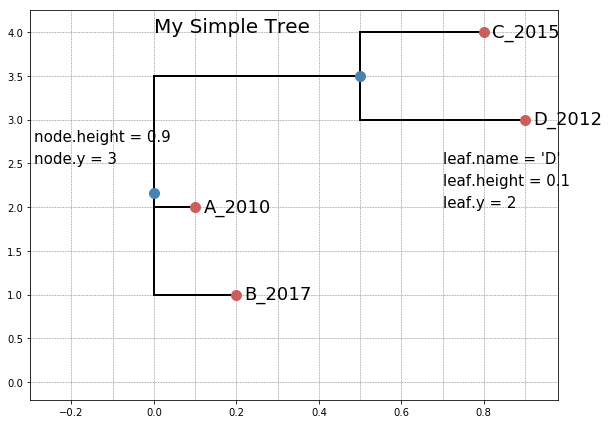

In [4]:
fig,ax = plt.subplots(figsize=(fig_w, fig_h),facecolor='w')


for k in tre.Objects:
    c = 'k'
    x=k.height
    y=k.y

    xp = k.parent.height
    if x is None: # matplotlib won't plot Nones, like root
        x = x_offset
    if xp==None:
        xp = x + x_offset

    if isinstance(k,bt.leaf) or k.branchType=='leaf':
        ax.scatter(x, y, s=100, color="indianred", zorder=12)
        
        # Draw tipname next to tip
        ax.text(x+tipname_x_offset, y, 
                k.name, 
                verticalalignment="center",
                fontsize=tipname_fontsize)

    elif isinstance(k,bt.node) or k.branchType=='node':
        ax.plot([x,x],
                [k.children[-1].y,k.children[0].y],
                lw=branchWidth,
                color='k',ls='-',zorder=9)
        
        ax.scatter(x, y, s=100, color="steelblue", zorder=12)

    # Draw horizontal lines
    ax.plot([xp,x],[y,y],lw=branchWidth,color='k',ls='-',zorder=9)

# Add title
ax.text(title_x, title_y, title_text, fontsize=title_text_size)

# Draw gridlines manually
for i in np.arange(-0.3, 1.0, 0.1):
    plt.axvline(x=i, ls="--", lw=0.5, c="grey")
[plt.axhline(y=i, ls="--", lw=0.5, c="grey") for i in np.arange(0, 4.1, 0.5)]

# Draw class diagram for D
lf_d = tre.leaves[0]
for lf in tre.leaves:
    if lf.name == "D":
        lf_d = lf

x_d = 0.7
y_d = 2.5
y_interval = 0.25
uml_fontsize = 15
ax.text(x_d, y_d, "leaf.name = 'D'", size=uml_fontsize)
ax.text(x_d, y_d-y_interval, "leaf.height = "+str(lf_d.height), size=uml_fontsize)
ax.text(x_d, y_d-(2*y_interval), "leaf.y = "+str(lf_d.y), size=uml_fontsize)

# Class diagram for leftmost internal node
x_d = -0.29
y_d = 3.0
y_interval = 0.25
uml_fontsize = 15
nd = tre.nodes[0]
ax.text(x_d, y_d-y_interval, "node.height = "+str(lf.height), size=uml_fontsize)
ax.text(x_d, y_d-(2*y_interval), "node.y = "+str(lf.y), size=uml_fontsize)

ax.set_xlim(-0.3, 0.98)
plt.tight_layout()

# Saves the figure to a png. pdf option also available. 
#plt.savefig("baltic-tree-example.png", bbox_inches="tight")

plt.show()

In [7]:
nd = tre.nodes[-1]
lf_d.absoluteTime

2016.1999999999998